In [4]:
!git clone https://github.com/WongKinYiu/yolov7 # Downloading YOLOv7 repository and installing requirements
%cd yolov7
!pip install -qr requirements.txt

In [5]:
!wget "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt" # weights of yolov7

### **Create configuration**

In [18]:
import os
from distutils.dir_util import copy_tree

fromDir = "/kaggle/input/yolo-drone-detection-dataset"
toDir = "temp"

copy_tree(fromDir,toDir)

In [19]:
# Create configuration
import yaml
config = {'path': 'temp/drone_dataset',
         'train': 'temp/drone_dataset/train',
         'val': 'temp/drone_dataset/valid',
         'nc': 1,
         'names': ['drone']}
 
with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

### **YOLOv7 Models**

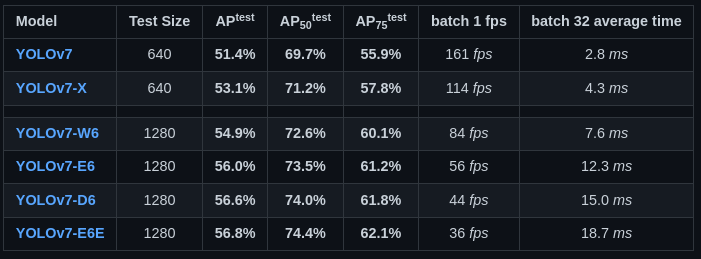

### **YOLOv7 Performance**

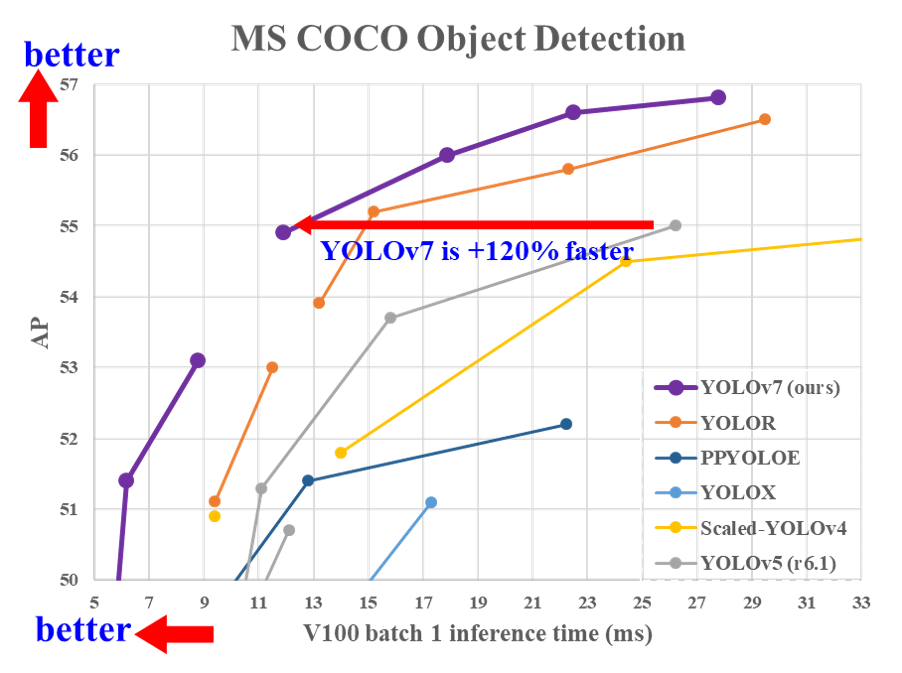

### **Model Parameters**

In [27]:
SIZE = 640
BATCH_SIZE = 16
EPOCHS = 20
MODEL = "yolov7"
WORKERS = 4
PROJECT = "drone_detection"
RUN_NAME = f"{MODEL}_size{SIZE}_epochs{EPOCHS}_batch{BATCH_SIZE}"

## **Model Training**

In [28]:
import torch
torch.cuda.empty_cache()

In [29]:
!wandb disabled

In [30]:
!python train.py --img {SIZE} --batch {BATCH_SIZE} --epochs {EPOCHS} --data ./data.yaml --weights {MODEL}.pt --device 0 --workers {WORKERS} --project {PROJECT} --name {RUN_NAME} --exist-ok

## **Model Fine Tuning**

In [ ]:
# !python train.py --img {SIZE} --batch {BATCH_SIZE} --epochs {EPOCHS} --data ./data.yaml --weights {MODEL}.pt --workers {WORKERS} --project {PROJECT} --name freeze_layers --exist-ok --freeze 0 1 2 3 4 5 6 7 8 9 10

## **Extracting the Model Weights**

In [31]:
!zip -r yolo_drone_model.zip "./drone_detection"

In [32]:
from IPython.display import FileLink
FileLink(r'yolo_drone_model.zip')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# **Inference Model**

In [2]:
import cv2
import torch
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

### **Load Model and Predict**

In [5]:
model = torch.hub.load("/kaggle/input/custome-yolov7-drone-detection/yolov7", 'custom', "/kaggle/input/custome-yolov7-drone-detection/yolov7/yolov7/drone_detection/yolov7_size640_epochs20_batch16/weights/best.pt", source='local', force_reload=True)

In [11]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0001.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 
results.save()
for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img

In [12]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0015.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 
results.save()
for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img

In [13]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0014.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 
results.save()
for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img

In [14]:
# Image
img_path = '../input/yolo-drone-detection-dataset/drone_dataset/valid/images/0008.jpg'

img = Image.open(img_path)
img_arr = np.array(img)

# Inference
results = model(img, size=640)

# Results, change the flowing to: results.show()
result_pd = results.pandas().xyxy[0] # or .show(), .save(), .crop(), .pandas(), etc 
results.save()
for i in range(len(result_pd)):
    shape = [(result_pd['xmin'][i], result_pd['ymin'][i]), (result_pd['xmax'][i], result_pd['ymax'][i])]
    img1 = ImageDraw.Draw(img)
    img1.rectangle(shape, outline ="red")
    
img